In [ ]:
#Importando bibliotecas
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

**Carregando os arquivos a serem utilizados no modelo**

Features.csv - Arquivo que contém informações como: valores utilizados em feriados, indicador de feriado

train.csv - Arquivo que contém os valores de vendas

---



In [ ]:
df = pd.read_csv('features.csv')
dftrain = pd.read_csv('trainV3.csv')


A classe Previsao_de_Vendas tem como objetivo, através de seus métodos, fazer tratamento de dados, realizar o treinamento do modelo, fazer a previsão e realizar o score do resultado do modelo

In [ ]:
class Previsao_de_Vendas:

  def processa_Store_Dept(self, store, dept, df_Original):

   #print ('Processa store : ' + str(store))
   #print ('dept : ' + str(dept))
   qry = 'Store == ' + str(store) + ' & Dept == ' + str(dept)
   df_Store_Dept = df_Original.query(qry)
    
   return df_Store_Dept

  def setar_Campos(self, df): 
    df_XTrain = df[['Store','Date','IsHoliday_y', 'Dept', 'Weekly_Sales','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']]
        
    return df_XTrain

  def tratando_Dados(self, df):
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index(['Date'], inplace=True)
    df.fillna(0, inplace=True)
    df[['Store','Dept','IsHoliday_y','Weekly_Sales','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].shift(1)
    df = df.iloc[1:]
    df = pd.get_dummies(df)
    return df  

  def setando_y(self, df):
    y_train = df[['Weekly_Sales']]
    y_train = y_train.iloc[1:]
    return y_train

  def treinar_Modelo(self, X, y):
    reg = LinearRegression()
    reg.fit(X, y)
    
    return reg
  
  def prever(self, reg, df):
    resultado = reg.predict(df)

    return resultado

  def verificar_Score(self, y, result):
    result_score = r2_score(y, result)

    return result_score 


Fazendo o merge entre os arquivos train e feature que possuem lojas e datas em commum

In [ ]:
df_testeFeature = dftrain.merge(df, on=['Store','Date'], how='left')

In [ ]:
df_testeFeature.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


Esta é a parte do modelo que aciona a classe Previsao_de_Vendas. A previsão será feita para cada departamento de uma loja

In [ ]:

lista_Geral_resultados = []
dept_Aux = 0
j = 0
for i in df_testeFeature.index:
    
  if df_testeFeature['Dept'][i] != dept_Aux:
    #print('Chama func Store: ' + str(df_testeFeature.iloc[i].Store) + ' - Dept: ' + str(df_testeFeature.iloc[i].Dept) )
    #print('Chama func Store: ' + str(df_testeFeature['Store'][i]) + ' - Dept: ' + str(df_testeFeature['Dept'][i]) )
    storesDept = Previsao_de_Vendas()
    df_StoreDept = storesDept.processa_Store_Dept(df_testeFeature['Store'][i], df_testeFeature['Dept'][i], df_testeFeature)
    df_XTeste = storesDept.setar_Campos(df_StoreDept)
    y = storesDept.setando_y(df_XTeste)
    df_XTeste = storesDept.tratando_Dados(df_XTeste)
    regressao = storesDept.treinar_Modelo(df_XTeste, y)
    result = storesDept.prever(regressao, df_XTeste)
    resultado_score = storesDept.verificar_Score(y, result)
    lista = []
    lista.append(df_testeFeature['Store'][i])
    lista.append(df_testeFeature['Dept'][i])
    lista.append(result[result.size - 1])
    lista.append(resultado_score)
    #lista.append(j)
    lista_Geral_resultados.append(lista)
    dept_Aux = df_testeFeature['Dept'][i]
    j = 0
  
  j +=1
  if df_testeFeature['Dept'][i] > 10:
    break
    


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

In [ ]:
lista_Geral_resultados

[[1, 1, array([27390.81]), 1.0],
 [1, 2, array([43134.88]), 1.0],
 [1, 3, array([9350.9]), 1.0],
 [1, 4, array([36292.6]), 1.0],
 [1, 5, array([25846.94]), 1.0],
 [1, 6, array([4032.5]), 1.0],
 [1, 7, array([21449.85]), 1.0],
 [1, 8, array([39255.35]), 1.0],
 [1, 9, array([41040.84]), 1.0],
 [1, 10, array([26285.27]), 1.0],
 [1, 11, array([22399.83]), 1.0]]

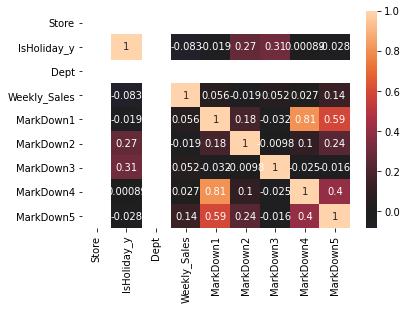

In [ ]:
sns.heatmap(df_XTeste.corr(), annot=True, center=0)

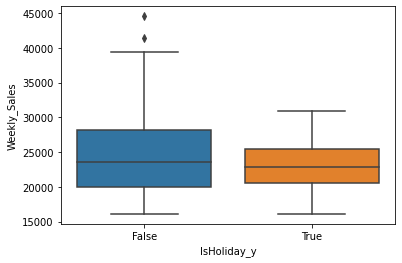

In [ ]:
sns.boxplot(data=df_XTeste, x='IsHoliday_y', y='Weekly_Sales')

Text(0, 0.5, 'Vendas semanais')

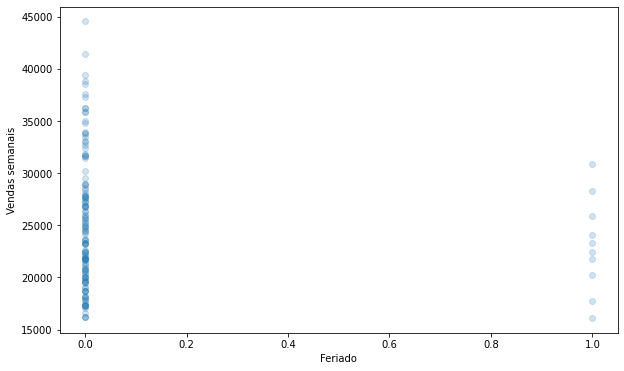

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df_XTeste['IsHoliday_y'], df_XTeste['Weekly_Sales'], alpha=0.2)
#x = [0, 400, 1000]
#y = [0, 10000, 20000]
#plt.plot(x, y, c='r')
plt.xlabel('Feriado')
plt.ylabel('Vendas semanais')

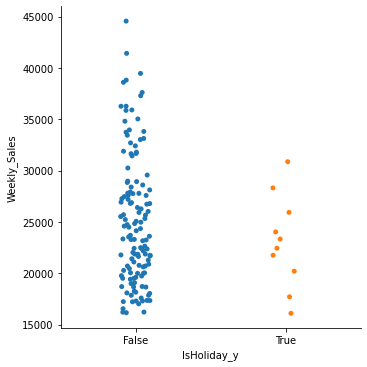

In [ ]:
sns.catplot(data=df_XTeste, x='IsHoliday_y', y='Weekly_Sales')

In [ ]:
df_XTeste['Weekly_Sales'][141]

22399.83